In [1]:
%matplotlib notebook

from modsim import *

In [2]:
m = UNITS.meters
s = UNITS.seconds

In [3]:
import random

In [4]:
condition = Condition(floorheight = 3,
                     num_floors = 1,
                     v_max = .762,
                     a_max = .65)

In [5]:
# 18 seconds for elevator to start, 9 to stop, 13 between floors

In [6]:
def find_magic_num(v_max, a_max):
    t = v_max / a_max
    num_magic = .5 * a_max * t **2 + v_max * t
    return num_magic

In [7]:
find_magic_num(condition.v_max, condition.a_max)

1.3399476923076923

In [8]:
def make_system(condition):
    unpack(condition)
    height = floorheight * num_floors
    init = State(y = 0, vy = 0)
    ts = linspace(0,32,100)
    magic_num = find_magic_num(v_max, a_max)
    return System(init = init,end_time = 0, finished = False, a_max = a_max, v_max = v_max, magic_num = magic_num, height = height, ts = ts)

    

In [9]:
system = make_system(condition)
system.finished

False

In [10]:
def slope_func(state, t, system):
    unpack(system)
    y, vy = state
    ay = a_max
    if (t < 18):
        return 0,0
    if(t > end_time):
        return 0,0
    if(height < y + magic_num):
        ay = -a_max 
        vy += ay
        #print(t)
    if(y> height):
        print(t , "finished")
        print(y)
        print(height)
        system.end_time = t
    if(vy > v_max):
        ay = 0
        vy = v_max
    
    return vy,ay

In [11]:
system.end_time = 1000
run_odeint(system, slope_func)

52.47805128704816 finished
15.0331635143
3.0
22.885209723436887 finished
3.75829087858
3.0


C:\ProgramData\Miniconda3\lib\site-packages\scipy\integrate\odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


<IPython.core.display.Javascript object>


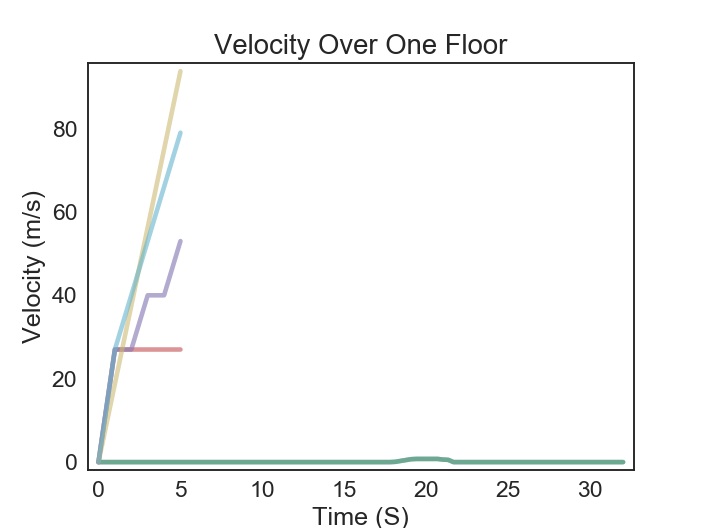

Saving figure to file velocity1


In [12]:
plot(system.results.vy)
system.height
title("Velocity Over One Floor")
xlabel("Time (S)")
ylabel("Height (M)")
savefig('velocity1')

In [13]:
plot(system.results.vy)
system.height
title("Velocity Over One Floor")
xlabel("Time (S)")
ylabel("Velocity (m/s)")
savefig('velocity1')

Saving figure to file velocity1


In [14]:
floors = [0,1,2,3,4,10]

In [15]:
system.end_time

22.885209723436887

In [16]:
def multiple_floors(floors):
    total_time = 0
    for i in range(len(floors) - 1):
        if(floors[i] != floors[i+1]):
            condition = Condition(floorheight = 3 *m,
                     num_floors = floors[i+1] - floors[i],
                     v_max = .762 * m / s,
                     a_max = .65 * m / s ** 2)
            system = make_system(condition)
            run_odeint(system,slope_func)
            total_time += system.end_time + 13
    total_time += 14
    return total_time
        

In [17]:
def sweep_basic_floors(max):
    sweep = SweepSeries()
    sweep[0] = 0
    for i in range(max):
        condition = Condition(floorheight = 3 *m,
                     num_floors = i,
                     v_max = .762 * m / s,
                     a_max = .65 * m / s ** 2)
        system = make_system(condition)
        run_odeint(system,slope_func)
        sweep[i + 1] = system.end_time + 27
    return sweep

In [18]:
sweep = sweep_basic_floors(10)

In [19]:
def sweep_3_people(max):
    sweep = SweepSeries()
    sweep[0] = 0
    for i in range(max):
        floors = [0,random.randint(1,i + 1), random.randint(1,i + 1), i + 1]
        floors.sort()
        sweep[i+ 1] = multiple_floors(floors)
    return sweep

In [20]:
def sweep_7_people(max):
    sweep = SweepSeries()
    sweep[0] = 0
    for i in range(max):
        floors = [0,random.randint(1,i + 1), random.randint(1,i + 1), random.randint(1,i + 1), random.randint(1,i + 1), random.randint(1,i + 1), random.randint(1,i + 1), i + 1]
        floors.sort()
        sweep[i+ 1] = multiple_floors(floors)
    return sweep

In [21]:
sweep2 = sweep_3_people(10)

In [22]:
print(sweep)

0      0
1     27
2     27
3     27
4     27
5     27
6     27
7     27
8     27
9     27
10    27
dtype: int64


In [23]:
def walking(max):
    sweep = SweepSeries()
    for i in range(max + 1):
        sweep[i] = 18.75* i
    return sweep

In [24]:
sweep = sweep_basic_floors(5)
sweep2 = sweep_3_people(5)
sweep3 = walking(5)
sweep4 = sweep_7_people(5)
plot(sweep)
plot(sweep2)
plot(sweep3)
plot(sweep4)

In [30]:
def sweep_n_people(n, max):
    sweep=SweepSeries
    sweep[0]=0
    for i in range(max):
        floors[0]=0
        for j in range(n):
            floor[n]=random.randint(1,j+1)
        floors.sort()
        sweep[i+ 1] = multiple_floors(floors)
    return sweep
    

In [25]:
def walking_better_single(max):
    if(walking(max)<sweep_basic_floors(max)):
        return true
    else:
        return false

In [28]:
def walking_better_multi(n,max):
    if(walking(max)<multiple_floors(sweep_n_people(n,max))):
        return true
    else:
        return false